**Connect google drive**

In [ ]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Wed Jan 11 18:19:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
 Celular
'Colab Notebooks'
'curruculum (2).rar'
 CV
'CV. Ing. Industrial - Eloisa Cortiñas Bruno.pdf'
'CV-Ing. Industrial.Eloisa Elena Cortiñas.docx'
 DETR
 Elo
'fotos aniversario'
'FOTOS CELULAR (07-11-2014)'
'FOTOS RIO'
'Fotos scaner'
 KIZOA-Movie-Maker-asmkm3a9.mp4
 MicroStrategy
'My Drive'
 PANDAS
 Parecidos.wmv
 Peñaflor
 Peyte
'rebajahabilitacindecomercio (1).zip'
'Salvador de Bahía'
 TRAMONTO
 yolov3
 yolov4
 yolov7


In [ ]:
import os
if not os.path.isdir('yolov4'):
  os.makedirs('yolov4')

**1) Clone, configure & compile Darknet**



In [ ]:
# Clone
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15502, done.
remote: Total 15502 (delta 0), reused 0 (delta 0), pack-reused 15502
Receiving objects: 100% (15502/15502), 14.15 MiB | 22.75 MiB/s, done.
Resolving deltas: 100% (10404/10404), done.


In [ ]:
# Configure
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# Compile
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

**2) Configure yolov4.cfg file**

In [ ]:
# Make a copy of yolov4.cfg
!cp cfg/yolov4.cfg cfg/yolov4-custom.cfg

In [ ]:
# Change lines in yolov4.cfg file
!sed -i 's@batch=64@batch=20@' cfg/yolov4-custom.cfg
!sed -i 's@subdivisions=8@subdivisions=16@' cfg/yolov4-custom.cfg
!sed -i 's@max_batches = 500500@max_batches = 2000@' cfg/yolov4-custom.cfg
!sed -i 's@width=608@width=416@' cfg/yolov4-custom.cfg
!sed -i 's@height=608@height=416@' cfg/yolov4-custom.cfg
!sed -i 's@steps=400000,450000@steps=1600,1800@' cfg/yolov4-custom.cfg
!sed -i '968 s@classes=80@classes=1@' cfg/yolov4-custom.cfg
!sed -i '1056 s@classes=80@classes=1@' cfg/yolov4-custom.cfg
!sed -i '1144 s@classes=80@classes=1@' cfg/yolov4-custom.cfg
!sed -i '961 s@filters=255@filters=18@' cfg/yolov4-custom.cfg
!sed -i '1049 s@filters=255@filters=18@' cfg/yolov4-custom.cfg
!sed -i '1137 s@filters=255@filters=18@' cfg/yolov4-custom.cfg

Option for yolov4-tiny

In [ ]:
# Make a copy of yolov4.cfg for tiny model
!cp cfg/yolov4-tiny.cfg cfg/yolov4-tiny-custom.cfg

In [ ]:
# Changes lines in yolov4-tiny.cfg

!sed -i 's@batch=64@batch=20@' cfg/yolov4-tiny-custom.cfg
!sed -i 's@subdivisions=1@subdivisions=16@' cfg/yolov4-tiny-custom.cfg
!sed -i 's@max_batches = 2000200@max_batches = 6000@' cfg/yolov4-tiny-custom.cfg
!sed -i 's@width=608@width=416@' cfg/yolov4-tiny-custom.cfg
!sed -i 's@height=608@height=416@' cfg/yolov4-tiny-custom.cfg
!sed -i 's@steps=1600000,1800000@steps=1600,1800@' cfg/yolov4-tiny-custom.cfg
!sed -i '280 s@classes=80@classes=1@' cfg/yolov4-tiny-custom.cfg
!sed -i '229 s@classes=80@classes=1@' cfg/yolov4-tiny-custom.cfg
!sed -i '274 s@filters=255@filters=18@' cfg/yolov4-tiny-custom.cfg
!sed -i '221 s@filters=255@filters=18@' cfg/yolov4-tiny-custom.cfg

**3) Create .names and .data files**

In [ ]:
!echo -e 'maiz14' > data/obj.names
!echo -e 'classes= 1\ntrain  = data/train.txt\nvalid  = data/test.txt\nnames = data/obj.names\nbackup = /mydrive/yolov4' > data/obj.data

**4) Save yolov4_custom.cfg and obj.names files in Google drive**

In [ ]:
!cp /content/darknet/cfg/yolov4-custom.cfg /mydrive/yolov4/yolov4-custom.cfg 
!cp data/obj.names /mydrive/yolov4/classes.txt


Option for yolov4-tiny

In [ ]:
!cp /content/darknet/cfg/yolov4-tiny-custom.cfg /mydrive/yolov4/yolov4-tiny-custom.cfg 
!cp data/obj.names /mydrive/yolov4/classes.txt

**5) Create a folder and unzip image dataset**

In [ ]:
!mkdir data/obj
!unzip /mydrive/yolov4/images.zip -d data/obj     

Archive:  /mydrive/yolov4/images.zip
  inflating: data/obj/images/m13-m14-0000.jpg  
  inflating: data/obj/images/m13-m14-0000.txt  
  inflating: data/obj/images/m13-m14-0022.jpg  
  inflating: data/obj/images/m13-m14-0022.txt  
  inflating: data/obj/images/m13-m14-0025.jpg  
  inflating: data/obj/images/m13-m14-0025.txt  
  inflating: data/obj/images/m13-m14-0031.jpg  
  inflating: data/obj/images/m13-m14-0031.txt  
  inflating: data/obj/images/m13-m14-0034.jpg  
  inflating: data/obj/images/m13-m14-0034.txt  
  inflating: data/obj/images/m13-m14-0040.jpg  
  inflating: data/obj/images/m13-m14-0040.txt  
  inflating: data/obj/images/m13-m14-0043.jpg  
  inflating: data/obj/images/m13-m14-0043.txt  
  inflating: data/obj/images/m13-m14-0046.jpg  
  inflating: data/obj/images/m13-m14-0046.txt  
  inflating: data/obj/images/m13-m14-0049.jpg  
  inflating: data/obj/images/m13-m14-0049.txt  
  inflating: data/obj/images/m13-m14-0052.jpg  
  inflating: data/obj/images/m13-m14-0052.txt  
  i

For validation

In [ ]:
!mkdir data/val
!unzip /mydrive/yolov4/test_images.zip -d data/val

Archive:  /mydrive/yolov4/test_images.zip
  inflating: data/val/test_images/m13-m14-0028.jpg  
  inflating: data/val/test_images/m13-m14-0028.txt  
  inflating: data/val/test_images/m13-m14-0037.jpg  
  inflating: data/val/test_images/m13-m14-0037.txt  
  inflating: data/val/test_images/m13-m14-0064.jpg  
  inflating: data/val/test_images/m13-m14-0064.txt  
  inflating: data/val/test_images/m13-m14-0097.jpg  
  inflating: data/val/test_images/m13-m14-0097.txt  
  inflating: data/val/test_images/m13-m14-0196.jpg  
  inflating: data/val/test_images/m13-m14-0196.txt  
  inflating: data/val/test_images/m13-m14-0239.jpg  
  inflating: data/val/test_images/m13-m14-0239.txt  
  inflating: data/val/test_images/m13-m14-0396.jpg  
  inflating: data/val/test_images/m13-m14-0396.txt  
  inflating: data/val/test_images/m13-m14-1027.jpg  
  inflating: data/val/test_images/m13-m14-1027.txt  
  inflating: data/val/test_images/m13-m14-1221.jpg  
  inflating: data/val/test_images/m13-m14-1221.txt  
  in

**6) Create train.txt file**

In [ ]:
import glob
images_list = glob.glob("data/obj/images/*.jpg")
with open("data/train.txt", "w") as f:
    f.write("\n".join(images_list))

Create test.txt

In [ ]:
test_list = glob.glob("data/val/test_images/*.jpg")
with open("data/test.txt", "w") as f:
    f.write("\n".join(test_list))

**7) Download pre-trained weights for the convolutional layers file**

In [ ]:
! gdown https://drive.google.com/uc?id=1jNLQqTNPvqjA0IcuIJGic0kS1e_0fjBR 

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1jNLQqTNPvqjA0IcuIJGic0kS1e_0fjBR 



**8) Start training**

In [ ]:
#Inicial training
#!./darknet detector train data/obj.data cfg/yolov4-custom.cfg /mydrive/yolov4/yolov4.conv.137 -dont_show -i 0 -map
# Uncomment below and comment above to re-start your training from last saved weights
#!./darknet detector train data/obj.data cfg/yolov4-custom.cfg /mydrive/yolov4/yolov4-custom_last.weights -dont_show -i 0 -map

#For yolov4-tiny 
#!./darknet detector train data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov4/yolov4-tiny.conv.29 -dont_show -i 0 -map
# Uncomment below and comment above to re-start your training from last saved weights
!./darknet detector train data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov4/yolov4-tiny-custom_best.weights -dont_show -i 0 -map

Streaming output truncated to the last 5000 lines.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.000000), count: 1, class_loss = 0.000010, iou_loss = 0.000000, total_loss = 0.000010 
 total_bbox = 167473, rewritten_bbox = 0.366626 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.703409), count: 1, class_loss = 0.832783, iou_loss = 10.366332, total_loss = 11.199116 
 total_bbox = 167474, rewritten_bbox = 0.366624 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (i

In [ ]:
#copy into drive
!cp /content/darknet/chart_yolov4-custom.png /mydrive/yolov4/chart_yolov4-custom.png

In [ ]:
!cp /content/darknet/chart_yolov4-tiny-custom.png /mydrive/yolov4/chart_yolov4-tiny-custom2.png

**9) Detection**

In [ ]:
!./darknet detect /mydrive/yolov4/yolov4-entreno1/yolov4-custom.cfg /mydrive/yolov4/yolov4-entreno1/yolov4-custom_best.weights data/val/test_images/m13-m14-2109.jpg

 CUDA-version: 11020 (11020), cuDNN: 8.1.1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x

In [ ]:
!./darknet detect /mydrive/yolov4/Yolov4-tiny-entreno2/yolov4-tiny-custom.cfg /mydrive/yolov4/Yolov4-tiny-entreno2/yolov4-tiny-custom_best.weights data/val/test_images/m13-m14-2109.jpg

 CUDA-version: 11020 (11020), cuDNN: 8.1.1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	                           ->  10

In [ ]:
# define helper functions to show images
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

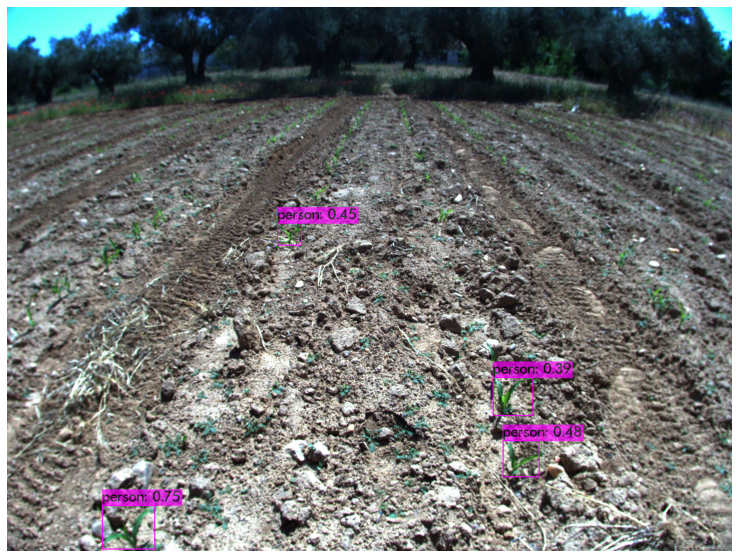

In [ ]:
imShow('/content/darknet/predictions.jpg')
